In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pylab
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN 
%matplotlib inline

In [35]:
df = pd.read_csv("customers.csv")

df["Annual Income (k$)"] = df["Annual Income (k$)"] * 1000

df = df.drop(columns=["CustomerID"])

columns = {"Gender": "Gender", "Age": "Age", "Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"}

df = df.rename(columns=columns)

df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  200 non-null    int64
 1   Age     200 non-null    int64
 2   Income  200 non-null    int64
 3   Score   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


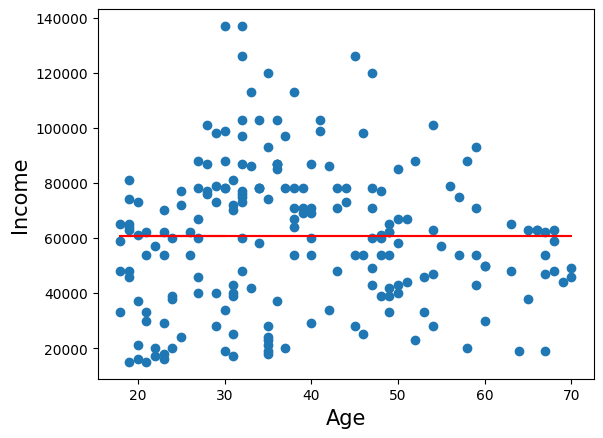

In [36]:
mean_income = [df["Income"].mean()] * len(df)

plt.scatter(df["Age"], df["Income"])
plt.plot(df["Age"], mean_income, "r")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Income", fontsize=15)
plt.show()

# We have the most income in the range of 30 to 50

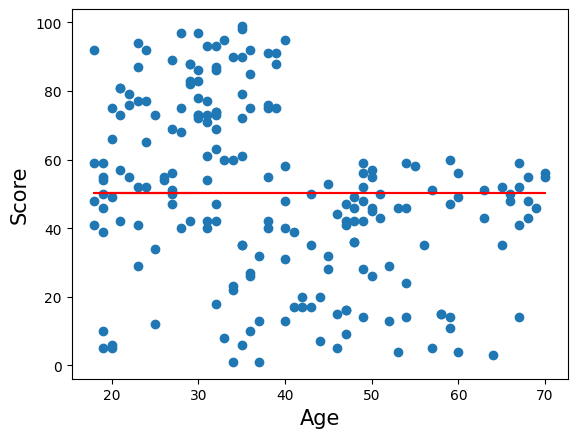

In [37]:
mean_score = [df["Score"].mean()] * len(df)

plt.scatter(df["Age"], df["Score"])
plt.plot(df["Age"], mean_score, "r")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.show()

# Young people have higher score than old people

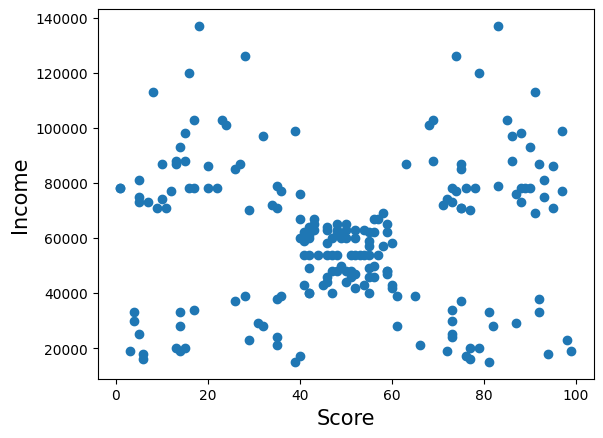

In [38]:
plt.scatter(df["Score"], df["Income"])
plt.xlabel("Score", fontsize=15)
plt.ylabel("Income", fontsize=15)
plt.show()

# We see that some people are stuck in a certain range of income, but as the graph shows, high income is not related to the score.

In [39]:
scaler = StandardScaler()
x = df.values
x = scaler.fit_transform(x)
x

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

# KMeans

In [40]:
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=12, random_state=4)
customerType = kmeans.fit_predict(x)
df["CustomerType"] = customerType + 1
labels = kmeans.labels_
labels

array([4, 4, 5, 5, 5, 5, 2, 5, 0, 5, 0, 5, 2, 5, 0, 4, 5, 4, 0, 5, 4, 4,
       2, 4, 2, 4, 2, 4, 2, 5, 0, 5, 0, 4, 2, 5, 2, 5, 2, 5, 2, 4, 0, 5,
       2, 5, 2, 5, 5, 5, 2, 4, 5, 0, 2, 0, 2, 0, 5, 0, 0, 4, 2, 2, 0, 4,
       2, 2, 4, 5, 0, 2, 2, 2, 0, 4, 2, 4, 5, 2, 0, 4, 0, 2, 5, 0, 2, 5,
       5, 2, 2, 4, 0, 2, 5, 4, 2, 5, 0, 4, 5, 2, 0, 4, 0, 5, 2, 0, 0, 0,
       0, 5, 2, 4, 5, 5, 2, 2, 2, 2, 4, 2, 1, 7, 5, 1, 6, 7, 0, 7, 6, 7,
       5, 1, 6, 1, 3, 7, 6, 1, 3, 7, 3, 1, 6, 7, 6, 1, 3, 7, 6, 7, 3, 1,
       3, 1, 6, 1, 6, 1, 3, 1, 6, 1, 6, 1, 6, 1, 3, 7, 6, 7, 6, 7, 3, 1,
       6, 7, 6, 7, 3, 1, 6, 1, 3, 7, 3, 7, 3, 1, 3, 1, 6, 1, 3, 1, 3, 7,
       6, 7])

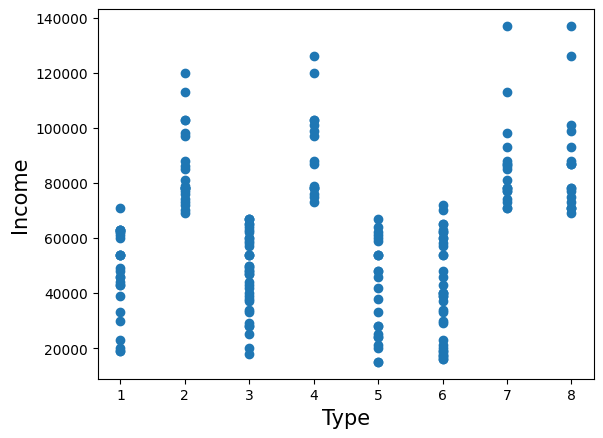

In [41]:
plt.scatter(df["CustomerType"], df["Income"])
plt.xlabel("Type", fontsize=15)
plt.ylabel("Income", fontsize=15)
plt.show()

# [1,3,5,8] are the types that have more income

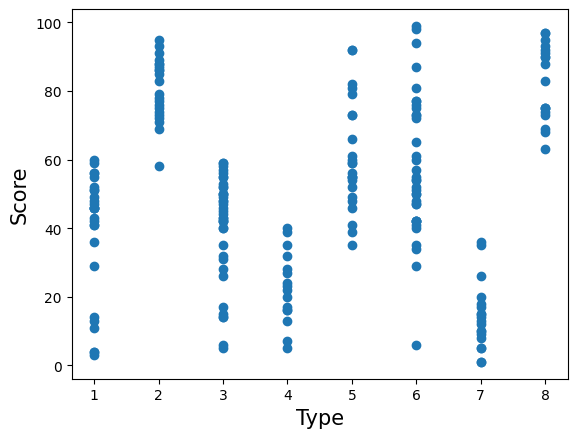

In [42]:
plt.scatter(df["CustomerType"], df["Score"])
plt.xlabel("Type", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.show()

# [3,4,5,7] are the type that have more score

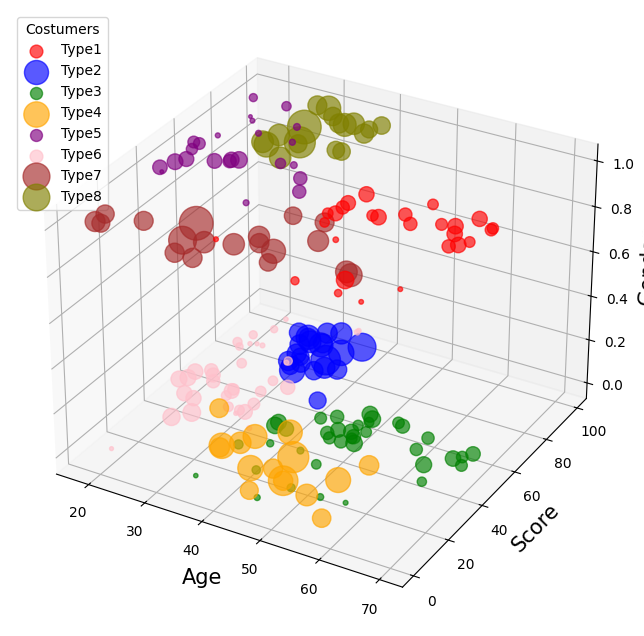

In [43]:
types = df["CustomerType"].value_counts()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatters = []
colors = ["red", "blue", "green", "orange", "purple", "pink", "brown", "olive", "gold", "cyan", "gray", "black"]

for i in range(1, len(types) + 1):
    x = df[df["CustomerType"] == i]["Age"].values
    y = df[df["CustomerType"] == i]["Score"].values
    z = df[df["CustomerType"] == i]["Gender"].values
    r = df[df["CustomerType"] == i]["Income"].values
    s = np.pi * (r ** 2) // 100000000
    
    scatter = ax.scatter(x, y, z, c=colors[i - 1], alpha=0.65, s=s, label=f"Type{i}")

    scatters.append(scatter)

ax.legend(handles=scatters, loc="upper left", title="Costumers")

ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Score", fontsize=15)
ax.set_zlabel("Gender", fontsize=15)

plt.show()

# X -> Age
# Y -> Score
# Z -> Gender (0, 1)
# Area -> Income

In [44]:
group = df.groupby('CustomerType').mean()
group

,Gender,Age,Income,Score
CustomerType,,,,
1,1.0,58.037037,47629.629630,38.851852
2,0.0,32.545455,85272.727273,80.590909
3,0.0,50.578947,47710.526316,40.736842
4,0.0,43.562500,91312.500000,22.750000
5,1.0,25.250000,41250.000000,60.916667
6,0.0,25.888889,41277.777778,57.944444
7,1.0,38.473684,85894.736842,14.210526
8,1.0,33.277778,87111.111111,82.666667


So we have 8 type of customer that 4 of them are for men and 4 for women, and clustering is more based on age and income than Score:

1- [old] [low-income] [man] [mid-score]

2- [mid-age] [high-income] [woman] [very-high-score]

3- [old] [low-income] [woman] [mid-score]

4- [old] [very-high-income] [woman] [low-score]

5- [young] [very-low-income] [man] [high-score]

6- [young] [very-low-income] [woman] [high-score]

7- [mid-age] [high-income] [man] [very-low-score]

8- [mid-age] [high-income] [man] [very-high-score]
